In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Data/data.csv")
df.columns

Index(['employee_id', 'date', 'first_name', 'last_name', 'gender', 'dob',
       'headcount_flag', 'leavers_flag', 'termination_date', 'joiners_flag',
       'voluntary_leavers_flag', 'involuntary_leavers_flag', 'department',
       'work_location_country', 'work_location_city', 'seniority_level',
       'performance_rating', 'behaviour_rating', 'ethnicity'],
      dtype='object')

In [25]:
df.dtypes

employee_id                 object
date                        object
first_name                  object
last_name                   object
gender                      object
dob                         object
headcount_flag               int64
leavers_flag                 int64
termination_date            object
joiners_flag                 int64
voluntary_leavers_flag       int64
involuntary_leavers_flag     int64
department                  object
work_location_country       object
work_location_city          object
seniority_level              int64
performance_rating          object
behaviour_rating            object
ethnicity                   object
dtype: object

In [26]:
df.head()

,employee_id,date,first_name,last_name,gender,dob,headcount_flag,leavers_flag,termination_date,joiners_flag,voluntary_leavers_flag,involuntary_leavers_flag,department,work_location_country,work_location_city,seniority_level,performance_rating,behaviour_rating,ethnicity
0,80-8559512,9/19/2019,Wilona,Highnam,Female,8/7/1971,1,0,NaN,1,0,0,Accounting,Russia,Dno,2,Meets Expectations,Unacceptable,Indian
1,02-8877831,6/30/2019,Corissa,Prestland,Female,4/25/1972,1,0,NaN,1,0,0,Services,Albania,Frakulla e Madhe,2,Exceeds Expectations,Meets Expectations,Pakistani
2,35-5477116,7/28/2019,Austine,Rathborne,Female,12/15/1965,1,0,NaN,0,0,0,Research and Development,Russia,Shali,6,Unacceptable,Needs Improvement,Bangladeshi
3,44-2557065,3/7/2020,Caroline,Jess,Female,6/4/1970,1,0,NaN,1,0,0,Legal,Portugal,Lagoa,9,Unacceptable,Unacceptable,Chinese
4,92-1910801,12/31/2021,Karia,Farnell,Male,12/8/1959,1,1,9/12/2021,0,1,0,Engineering,China,Yanghou,10,Unacceptable,Outstanding,African


In [27]:
# Finding most common gender
most_common_gender = df['gender'].mode()[0]
print("The most common gender is:", most_common_gender)

The most common gender is: Male


In [28]:
# Filtering the employees in the Training department and who have been terminated, then finding the most senior employee
terminated_training_employees = df[(df['department'] == 'Training') & (df['termination_date'].notnull())]
most_senior_terminated = terminated_training_employees[terminated_training_employees['seniority_level'] == terminated_training_employees['seniority_level'].min()]
print("The most senior employee in the Training department that has been terminated:")
print(most_senior_terminated)


The most senior employee in the Training department that has been terminated:
    employee_id       date first_name last_name  gender       dob  \
684  47-8736554  6/27/2021    Allissa  Pilsbury  Female  2/6/1998   

     headcount_flag  leavers_flag termination_date  joiners_flag  \
684               1             1        2/16/2019             0   

     voluntary_leavers_flag  involuntary_leavers_flag department  \
684                       0                         1   Training   

    work_location_country work_location_city  seniority_level  \
684                 China               Gexi                1   

       performance_rating behaviour_rating ethnicity  
684  Exceeds Expectations     Unacceptable    White   


In [29]:
leavers = df[df['leavers_flag'] == 1]
leavers_by_department = leavers['department'].value_counts()
department_with_most_leavers = leavers_by_department.idxmax()
print("The department with the most leavers is:", department_with_most_leavers)

The department with the most leavers is: Legal


In [30]:
voluntary_leavers = df[df['voluntary_leavers_flag'] == 1]
voluntary_leavers_by_country = voluntary_leavers['work_location_country'].value_counts()
country_with_most_voluntary_leavers = voluntary_leavers_by_country.idxmax()
print("The country with the most voluntary leavers is:", country_with_most_voluntary_leavers)

The country with the most voluntary leavers is: China


In [31]:
# Finding Junie Catteril date of birth
junie_catterill = df[(df['first_name'] == 'Junie') & (df['last_name'] == 'Catterill')]
junie_catterill_dob = junie_catterill['dob'].iloc[0]
print("Junie Catterill's date of birth is:", junie_catterill_dob)

Junie Catterill's date of birth is: 3/16/1990


In [32]:
# Finding Jay Caytons job title
jay_dep = df[(df['first_name'] == 'Jay') & (df['last_name'] == 'Cayton')]
department = jay_dep['department'].iloc[0]
print(f"Jay Cayton's department is: {department}")

Jay Cayton's department is: Sales


In [33]:
# Finding Common surnames
common_surnames = df['last_name'].value_counts()[lambda x: x > 1]
print(common_surnames)

Greener    2
Tuttle     2
Ducker     2
Rzehor     2
Sex        2
Skellen    2
Name: last_name, dtype: int64


In [34]:
from datetime import datetime
# Counting the number of employees with future termination dates
df['termination_date'] = pd.to_datetime(df['termination_date'])
current_date = datetime.now()
future_terminations = df[df['termination_date'] > current_date]
print("Number of employees with a termination date in the future:", len(future_terminations))

Number of employees with a termination date in the future: 0


In [35]:
# Finding the employee ID of the youngest employee
df['dob'] = pd.to_datetime(df['dob'])
youngest_index = df['dob'].idxmax()
youngest_employee_id = df.loc[youngest_index, 'employee_id']
print("Employee ID of the youngest employee:", youngest_employee_id)

Employee ID of the youngest employee: 95-3553511


In [41]:
# Find the department with the least number of employees
least_employees_department = df.groupby('department')['employee_id'].count().idxmin()
print("The least employees department is",least_employees_department)

The least employees department is Services


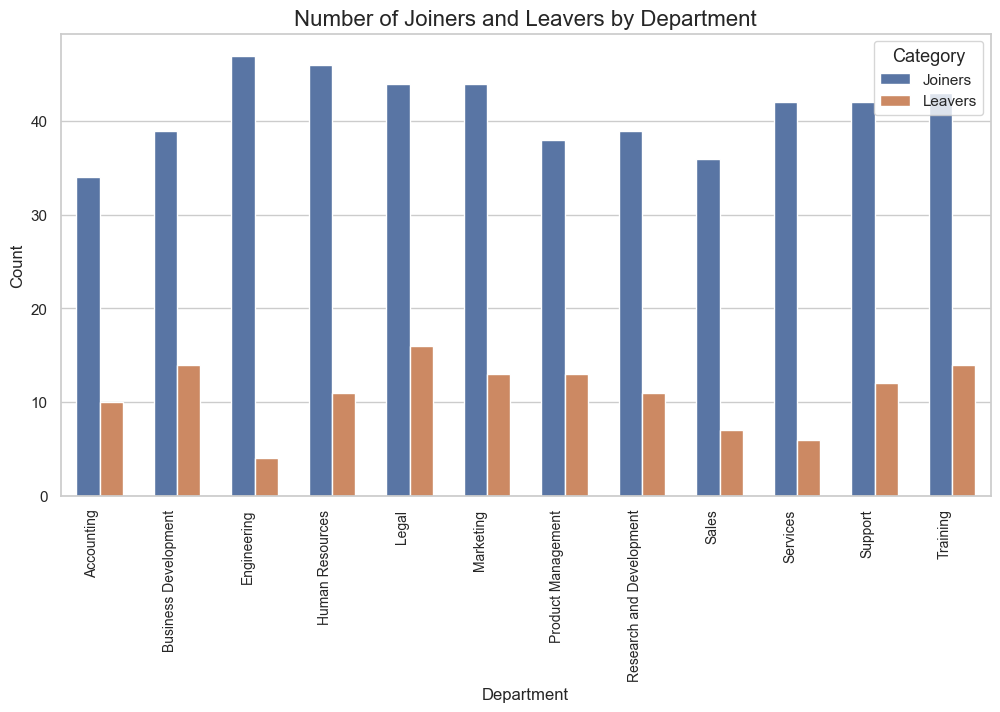

In [37]:
joiners = df[df['joiners_flag'] == 1]
leavers = df[df['leavers_flag'] == 1]
# Counting joiners and leavers by department
joiners_by_department = joiners['department'].value_counts()
leavers_by_department = leavers['department'].value_counts()
# Creating a DataFrame with joiners and leavers count by department
department_counts = pd.DataFrame({'Joiners': joiners_by_department, 'Leavers': leavers_by_department}).reset_index().rename(columns={'index': 'Department'})
# Creating a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Department', y='value', hue='variable', data=pd.melt(department_counts, id_vars='Department', var_name='variable', value_name='value'), width=0.6)
plt.title('Number of Joiners and Leavers by Department', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Category', title_fontsize='13', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10)
plt.show()

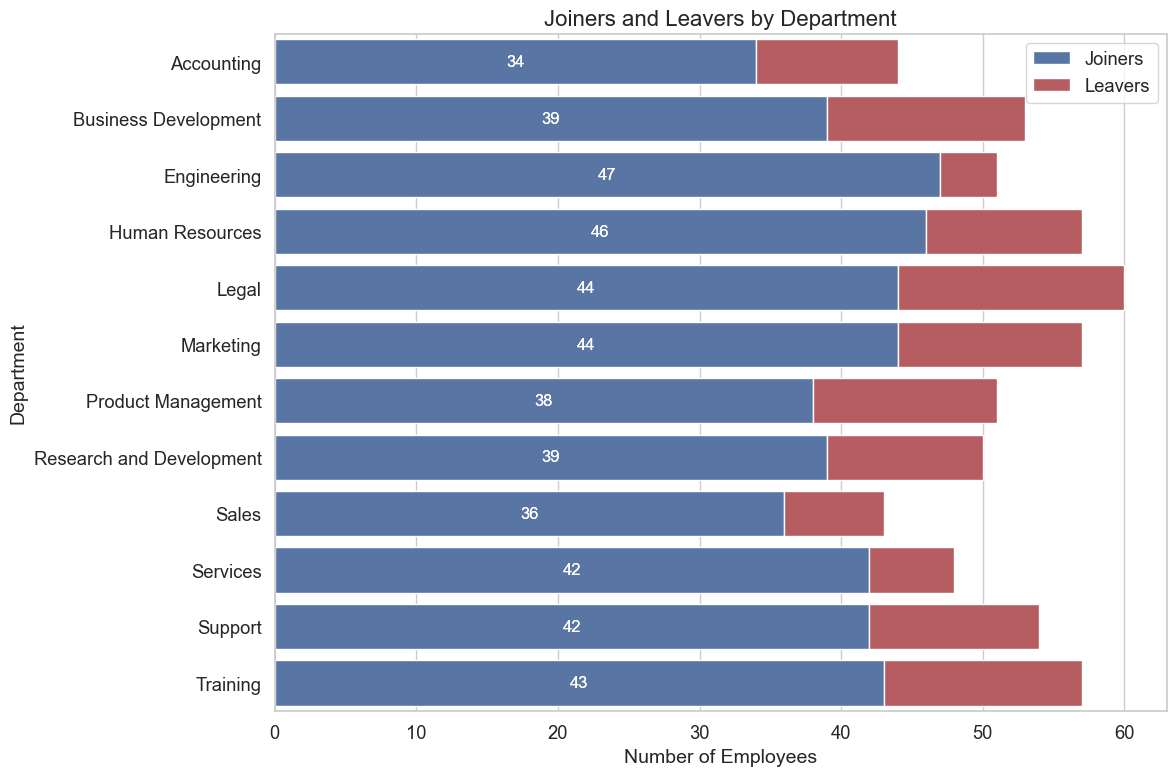

In [38]:
# Filtering and Merge joiners and leavers data
joiners = df[df['joiners_flag'] == 1].groupby('department').size().reset_index(name='joiners_count')
leavers = df[df['leavers_flag'] == 1].groupby('department').size().reset_index(name='leavers_count')
joiners_leavers = joiners.merge(leavers, on='department')

# Plot the data
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 8))
joiners_bar = sns.barplot(y='department', x='joiners_count', data=joiners_leavers, ax=ax, color='b', label='Joiners', orient='h')
leavers_bar = sns.barplot(y='department', x='leavers_count', data=joiners_leavers, ax=ax, color='r', left=joiners_leavers['joiners_count'], label='Leavers', orient='h')

ax.set_ylabel('Department', fontsize=14)
ax.set_xlabel('Number of Employees', fontsize=14)
ax.set_title('Joiners and Leavers by Department', fontsize=16)
ax.legend()

# Add the numbers to the bars
for patch in joiners_bar.containers[0]:
    width = patch.get_width()
    height = patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width/2, y + height/2, f'{width:.0f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

for patch in leavers_bar.containers[0]:
    width = patch.get_width()
    height = patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width/2, y + height/2, f'{width:.0f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()